# Problem Statement 
X Education Company sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Now, although X Education gets a lot of leads, its leads conversion rate is very poor. For example, if, I say, they acquire 100 leads in a day, only about 30 of them are converted. 

# So, what do X company needs?

The company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

# Goals of the Case Study

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



# 1. Read and understand the data

In [1]:
#Import Some libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)

In [2]:
# read the dataset
lead = pd.read_csv("Leads.csv")
lead.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [3]:
lead.tail(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


## Dependent variable 'Converted' 

- 0 - Not Converted
- 1 - Converted

In [4]:
# Shape of the Data set
lead.shape

(9240, 37)

In [5]:
# checking the statistical aspects of the data set
lead.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


-  <b>Looking at the stats we can say that TotalVisits, Total Time Spent on Website contains outliers

In [6]:
# Checking info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead.drop("Prospect ID",axis =1,inplace=True)
lead.head(3)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


# 2. EDA

In [8]:
# Checking Duplicate values and treatment
lead.duplicated().sum()

0

# Visualization

## categorical variables Visualization

In [9]:
cat_list = lead.select_dtypes(include='object').columns
cat_list

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

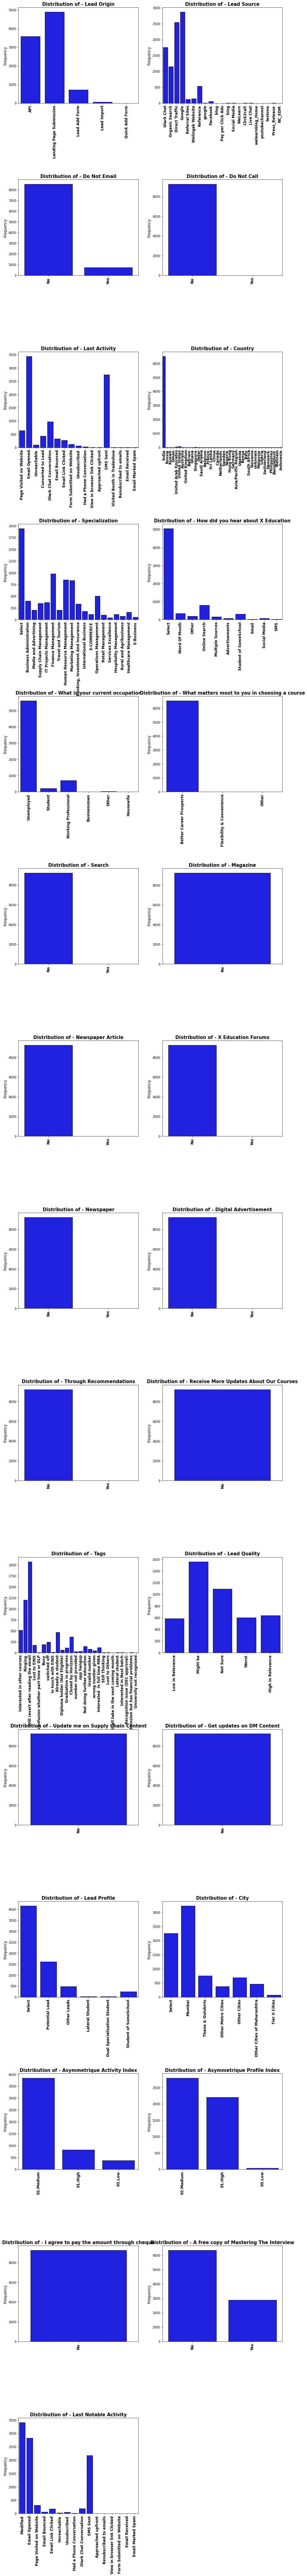

In [10]:
plt.figure(figsize=(20,40))
count=1
for var in cat_list:
    plt.subplot(15,2,count)
    sns.countplot(x = var, color='blue',edgecolor = 'black', data=lead )
    plt.title(f'Distribution of - {var}', size = 15,fontweight="bold")
    plt.xticks(rotation =90,size = 12,fontweight="bold")
    plt.xlabel("")
    plt.ylabel("Frequency",size = 12)
    plt.subplots_adjust(left=0.1, bottom=0.05, right=0.7, top=2.9,wspace=0.2, hspace=0.8)
    count+=1
    

- <b>There are lot of varaibles with imblace data, which we remove later as per businees problem and understanding

## continuous variables Visualization

In [11]:
con_list = lead.select_dtypes(exclude='object').columns[1:]
con_list

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

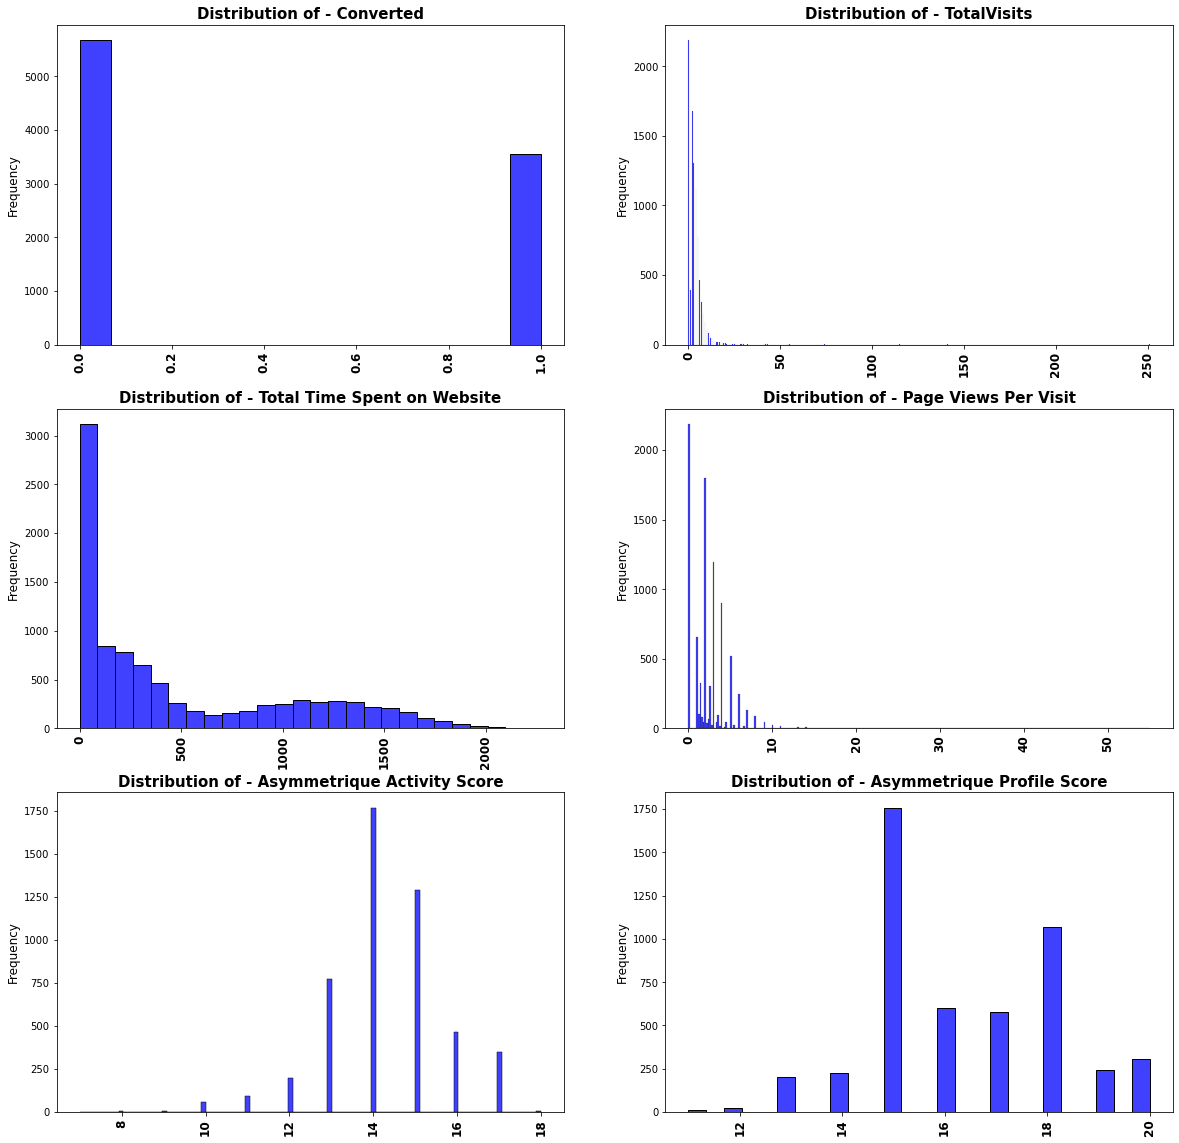

In [12]:
plt.figure(figsize=(20,20))
count=1
for var in con_list:
    plt.subplot(3,2,count)
    sns.histplot(x = var, color='blue',edgecolor = 'black', data=lead )
    plt.title(f'Distribution of - {var}', size = 15,fontweight="bold")
    plt.xticks(rotation =90,size = 12,fontweight="bold")
    plt.xlabel("")
    plt.ylabel("Frequency",size = 12)
    count+=1

- <b>Target column 'convereted' is 40/60 splitted, so we can consider it as  not imbalanced

### Checking null values and their treatment


In [13]:
null = (pd.DataFrame(round(100*lead.isnull().sum()/len(lead),2))).reset_index().rename(columns={"index":"Col_name",0:"Null"})
Nullcol = null[null.Null>0]
Null = Nullcol.Col_name.to_list()
Null

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [14]:
lead[Null].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Source                                    9204 non-null   object 
 1   TotalVisits                                    9103 non-null   float64
 2   Page Views Per Visit                           9103 non-null   float64
 3   Last Activity                                  9137 non-null   object 
 4   Country                                        6779 non-null   object 
 5   Specialization                                 7802 non-null   object 
 6   How did you hear about X Education             7033 non-null   object 
 7   What is your current occupation                6550 non-null   object 
 8   What matters most to you in choosing a course  6531 non-null   object 
 9   Tags                                           5887 

In [15]:
lead[Null].isnull().sum()

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64

In [16]:
round(100*lead[Null].isnull().sum()/len(lead),2)

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64

In [17]:
lead["Lead Source"] = lead["Lead Source"].fillna(lead["Lead Source"].mode()[0])
lead["Last Activity"] = lead["Last Activity"].fillna(lead["Last Activity"].mode()[0])

In [18]:
lead["TotalVisits"]=lead["TotalVisits"].fillna(lead["TotalVisits"].mean())
lead["Page Views Per Visit"]=lead["Page Views Per Visit"].fillna(lead["Page Views Per Visit"].mean())

In [19]:
# How did you hear about X Education
100*lead["How did you hear about X Education"].value_counts(normalize=True)

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [20]:
lead["How did you hear about X Education"] = lead["How did you hear about X Education"].replace(to_replace="Select",value=np.nan)

In [21]:
# Above 70% missing value there it is better to drop this column
lead.drop("How did you hear about X Education",axis =1, inplace= True)

In [22]:
lead["Country"]=lead["Country"].fillna(lead["Country"].mode()[0])
lead["What is your current occupation"]=lead["What is your current occupation"].fillna(lead["What is your current occupation"].mode()[0])
lead["What matters most to you in choosing a course"]=lead["What matters most to you in choosing a course"].fillna(lead["What matters most to you in choosing a course"].mode()[0])

In [23]:
# Specialization
100*lead["Specialization"].value_counts(normalize=True)


Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Media and Advertising                 2.601897
Travel and Tourism                    2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [24]:
lead["Specialization"] = lead["Specialization"].replace(to_replace="Select",value=np.nan)

In [25]:
100*lead["Specialization"].isnull().sum()/len(lead)

36.58008658008658

In [26]:
# lets create a new category
lead["Specialization"]=lead["Specialization"].fillna("Missing")

In [27]:
#Lead Profile
100*lead["Lead Profile"].value_counts(normalize=True)

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

In [28]:
lead["Lead Profile"] = lead["Lead Profile"].replace(to_replace="Select",value=np.nan)

In [29]:
100*lead["Lead Profile"].isnull().sum()/len(lead)

74.18831168831169

In [30]:
# Above 70% missing value there it is better to drop this column
lead.drop("Lead Profile",axis =1, inplace= True)

In [31]:
# City 
100*lead["City"].value_counts(normalize=True)


Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [32]:
lead["City"] = lead["City"].replace(to_replace="Select",value=np.nan)

In [33]:
lead["City"].isnull().sum()/len(lead)

0.3970779220779221

In [34]:
# let's create a new category for null value in city
lead["City"]=lead["City"].fillna("Missing")

In [35]:
# investigating "Tags","Lead Quality"
lead[lead["Tags"].isnull()]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
5,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Missing,01.High,02.Medium,17.0,15.0,No,No,Modified
7,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Missing,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened
14,660553,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.0,Email Bounced,Russia,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Missing,01.High,01.High,16.0,17.0,No,No,Email Bounced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,579822,Landing Page Submission,Direct Traffic,Yes,No,0,5.0,234,2.5,Page Visited on Website,India,E-COMMERCE,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Mumbai,01.High,02.Medium,17.0,15.0,No,No,Modified
9214,579808,API,Organic Search,No,No,1,2.0,881,2.0,SMS Sent,India,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Missing,02.Medium,02.Medium,15.0,15.0,No,No,SMS Sent
9215,579802,Landing Page Submission,Organic Search,No,No,0,8.0,397,8.0,Email Opened,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Thane & Outskirts,02.Medium,01.High,13.0,17.0,No,Yes,Email Opened
9218,579784,Landing Page Submission,Google,Yes,No,0,1.0,149,1.0,Email Bounced,India,Human Resource Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Mumbai,02.Medium,01.High,13.0,18.0,No,No,Modified


In [36]:
lead[lead["Lead Quality"].isnull()]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Missing,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
5,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Missing,01.High,02.Medium,17.0,15.0,No,No,Modified
7,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,India,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Missing,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,579769,Landing Page Submission,Direct Traffic,No,No,0,5.0,20,2.5,SMS Sent,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,NaN,No,No,Thane & Outskirts,02.Medium,01.High,13.0,19.0,No,Yes,Modified
9224,579753,Landing Page Submission,Google,No,No,0,4.0,455,4.0,Form Submitted on Website,India,Operations Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,NaN,No,No,Mumbai,03.Low,01.High,12.0,20.0,No,No,Modified
9230,579701,Landing Page Submission,Google,No,No,0,2.0,870,2.0,Email Opened,India,Human Resource Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,NaN,No,No,Mumbai,02.Medium,01.High,13.0,20.0,No,No,Email Opened
9233,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,SMS Sent,India,Missing,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,NaN,No,No,Missing,NaN,NaN,NaN,NaN,No,No,SMS Sent


In [37]:
# Since, there is no pattern found and missing values are above 30%, So it better to remove
lead.drop(["Tags","Lead Quality"],axis =1,inplace=True)

In [38]:
# Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score
# Though if we have above 40% missing value with these columns but these are the score assigned to customer 
# we will keep these column and replace the null values with mean or "Missing" as new category as per Feature type, it will be taken care by model itself
# if there will be less variance

In [39]:
lead["Asymmetrique Activity Index"] = lead["Asymmetrique Activity Index"].fillna("Missing")
lead["Asymmetrique Profile Index"] = lead["Asymmetrique Profile Index"].fillna("Missing")
lead["Asymmetrique Activity Score"]=lead["Asymmetrique Activity Score"].fillna(lead["Asymmetrique Activity Score"].mean())
lead["Asymmetrique Profile Score"]=lead["Asymmetrique Profile Score"].fillna(lead["Asymmetrique Profile Score"].mean())

In [40]:
lead.isnull().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

### Checking Outliers  + Some Analysis

In [41]:
sns.set_theme()

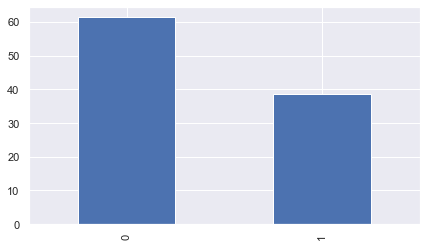

In [42]:
# check the Traget column for data imbalance
plt.figure(figsize=[7,4])
(100*lead["Converted"].value_counts()/len(lead)).plot.bar()
plt.show()

- Data is 40/60 splitted we are good to go, as we have seen above

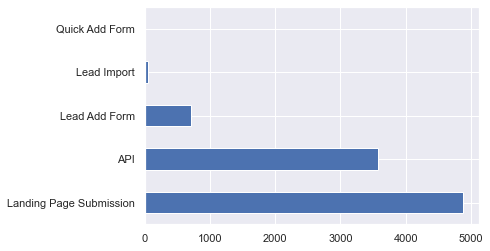

In [43]:
# Lead Origin
lead["Lead Origin"].value_counts().plot.barh()
plt.show()

- Clearly Landing page and API are most leads

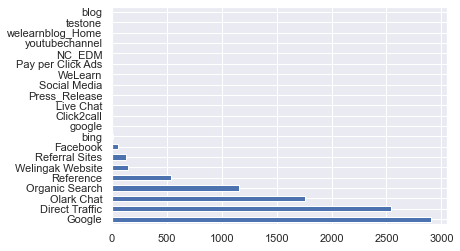

In [44]:
# Lead Source
lead["Lead Source"].value_counts().plot.barh()
plt.show()

- Google, Direct traffic, olark chat, organic search are the best source

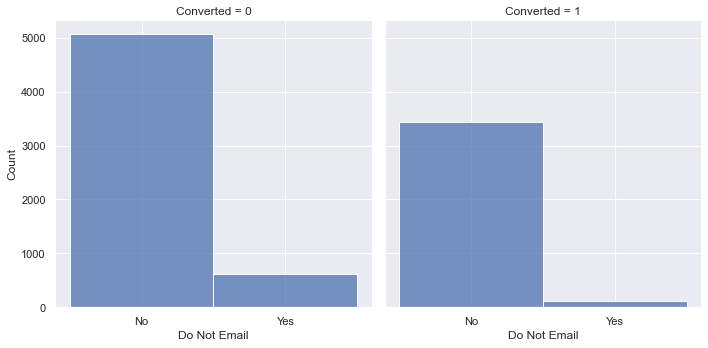

In [45]:
# Do Not Email
sns.displot(data=lead ,x=lead["Do Not Email"],col=lead["Converted"])
plt.show()

In [46]:
(100*lead["Do Not Email"].value_counts(normalize=True))

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [47]:
# since there is almost 0 variance so we drop the Do Not Email
lead.drop("Do Not Email",inplace = True, axis =1)


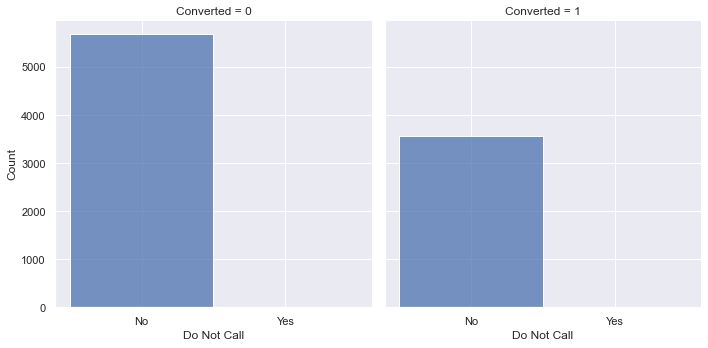

In [48]:
# Do Not Call
sns.displot(data=lead ,x=lead["Do Not Call"],col=lead["Converted"])
plt.show()

In [49]:
(100*lead["Do Not Call"].value_counts(normalize=True))

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [50]:
# since there is almost 0 variance we can drop Do Not Call
lead.drop("Do Not Call",inplace = True, axis =1)


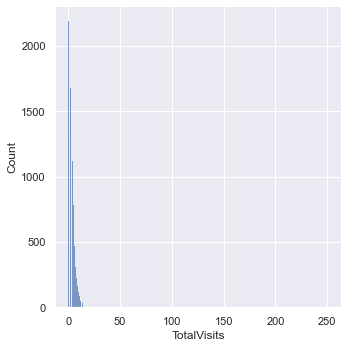

In [51]:
# TotalVisits
sns.displot(data=lead["TotalVisits"])
plt.show()

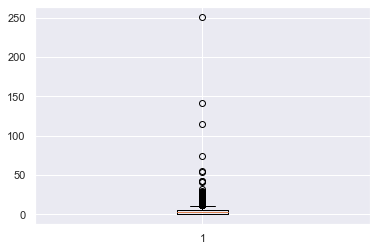

In [52]:
plt.boxplot(lead["TotalVisits"])
plt.show()

In [53]:
Q1 = lead["TotalVisits"].quantile(0.25)
Q3 = lead["TotalVisits"].quantile(0.75)
print("Q1 : ",Q1,"\nQ3 : ",Q3)
IQR = Q3-Q1
print("IQR : ",IQR)
Min = Q1-1.5*IQR
Max = Q3+1.5*IQR

print("Min: ",Min)
print("Max: ",Max)

Q1 :  1.0 
Q3 :  5.0
IQR :  4.0
Min:  -5.0
Max:  11.0


In [54]:
lead["TotalVisits"] = lead["TotalVisits"].apply(lambda x : Max if x>Max else x )

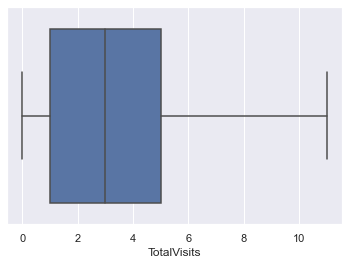

In [55]:
sns.boxplot(lead["TotalVisits"])
plt.show()

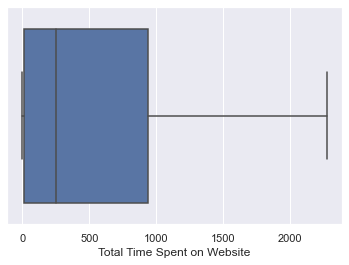

In [56]:
# Total Time Spent on Website
sns.boxplot(lead["Total Time Spent on Website"])
plt.show()

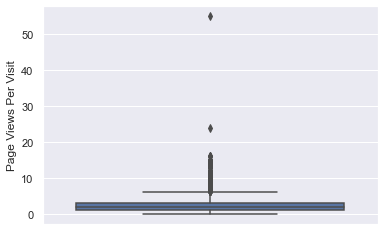

In [57]:
# Page Views Per Visit
sns.boxplot(y=lead["Page Views Per Visit"])
plt.show()

In [58]:
Q1 = lead["Page Views Per Visit"].quantile(0.25)
Q3 = lead["Page Views Per Visit"].quantile(0.75)
print("Q1 : ",Q1,"\nQ3 : ",Q3)
IQR = Q3-Q1
print("IQR : ",IQR)
Min = Q1-1.5*IQR
Max = Q3+1.5*IQR

print("Min: ",Min)
print("Max: ",Max)

Q1 :  1.0 
Q3 :  3.0
IQR :  2.0
Min:  -2.0
Max:  6.0


In [59]:
lead["Page Views Per Visit"] = lead["Page Views Per Visit"].apply(lambda x : Max if x>Max else x )

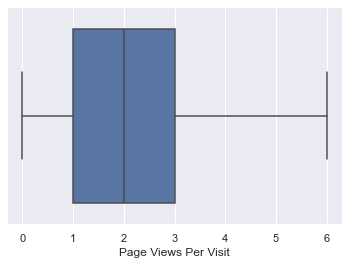

In [60]:
sns.boxplot(lead["Page Views Per Visit"])
plt.show()

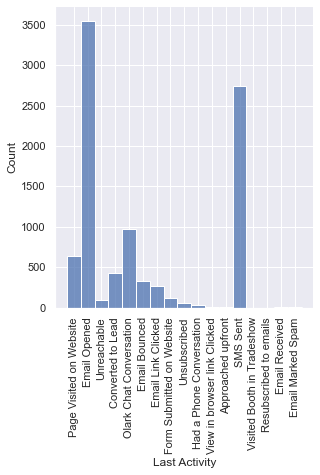

In [61]:
# Last Activity
sns.displot(data=lead ,x=lead["Last Activity"])
plt.xticks(rotation =90)
plt.show() 

<AxesSubplot:>

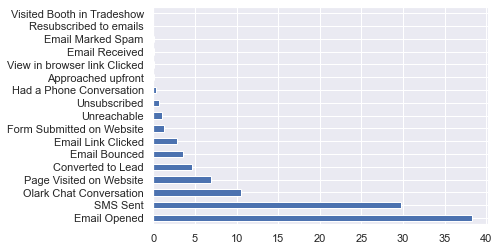

In [62]:
(100*lead["Last Activity"].value_counts(normalize=True)).plot.barh()

In [63]:
# Country
lead["Country"].value_counts(normalize=True)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Canada                   0.043290
Nigeria                  0.043290
Kuwait                   0.043290
Germany                  0.043290
South Africa             0.043290
Sweden                   0.032468
Asia/Pacific Region      0.021645
Netherlands              0.021645
China                    0.021645
Ghana                    0.021645
Philippines              0.021645
Italy                    0.021645
Uganda                   0.021645
Belgium                  0.021645
Bangladesh               0.021645
Liberia                  0.010823
Kenya         

In [64]:
# since variance in the country column is negligible, let's divide the country coulmn as India and Non- India, let the model decide
lead["Country"] = lead["Country"].apply(lambda x : "Non-India" if x != "India" else "India" )

In [65]:
lead["Country"].value_counts(normalize=True)*100

India        96.893939
Non-India     3.106061
Name: Country, dtype: float64

In [66]:
# Specialization
lead["Specialization"].value_counts()

Missing                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<AxesSubplot:>

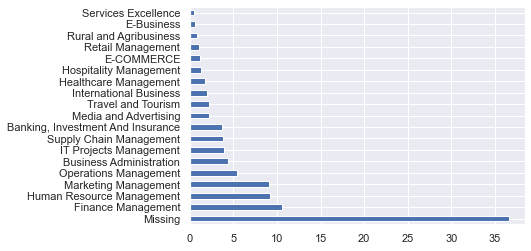

In [67]:
(100*lead["Specialization"].value_counts(normalize=True)).plot.barh()

<AxesSubplot:>

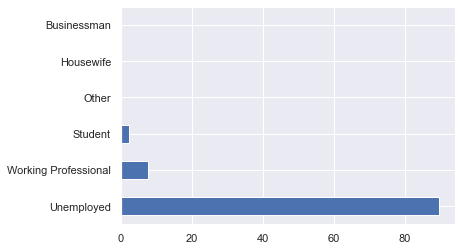

In [68]:
# What is your current occupation
(100*lead["What is your current occupation"].value_counts(normalize=True)).plot.barh()

-  most of the leads are unemployed 

<AxesSubplot:>

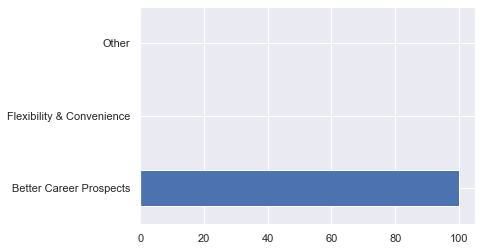

In [69]:
# What matters most to you in choosing this course
(100*lead["What matters most to you in choosing a course"].value_counts(normalize=True)).plot.barh()

In [70]:
lead["What matters most to you in choosing a course"].value_counts(normalize=True)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [71]:
# lead["What matters most to you in choosing a course"] to drop, Almost 0 Variance
lead.drop("What matters most to you in choosing a course",inplace = True, axis =1)


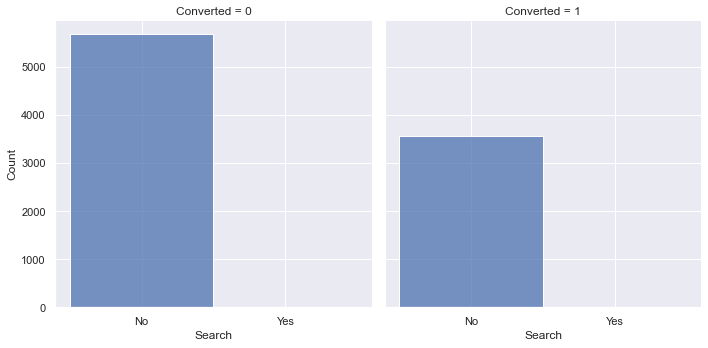

In [72]:
# Search
sns.displot(data=lead ,x=lead["Search"],col=lead["Converted"])
plt.show() 

In [73]:
(100*lead["Search"].value_counts(normalize=True))

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [74]:
# lead["Search"] to drop, Almost 0 Variance
lead.drop("Search",inplace = True, axis =1)

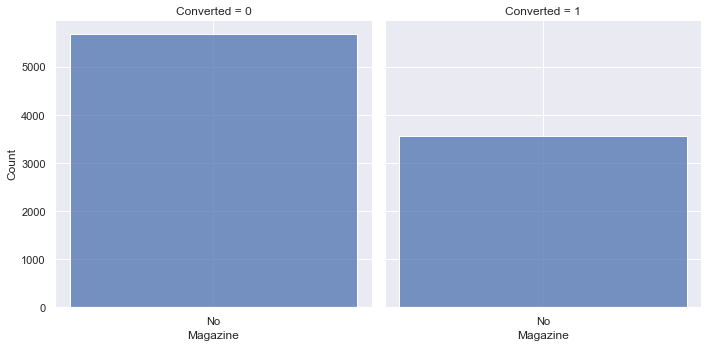

In [75]:
# Magazine
sns.displot(data=lead ,x=lead["Magazine"],col=lead["Converted"])
plt.show() 

In [76]:
(100*lead["Magazine"].value_counts(normalize=True))

No    100.0
Name: Magazine, dtype: float64

In [77]:
# lead["Magazine"] to drop, 0 Variance
lead.drop("Magazine",inplace = True, axis =1)

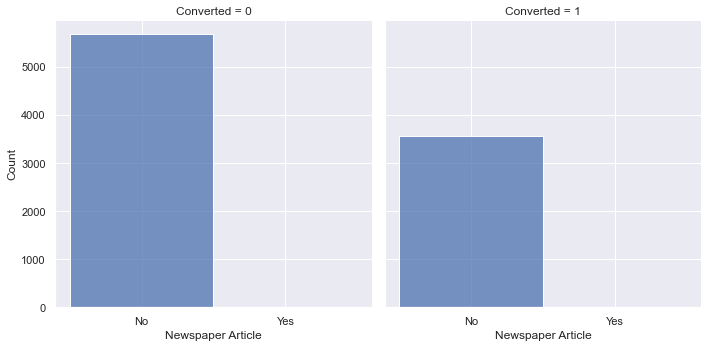

In [78]:
# Newspaper Article
sns.displot(data=lead ,x=lead["Newspaper Article"],col=lead["Converted"])
plt.show() 

In [79]:
lead["Newspaper Article"].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [80]:
# lead["Newspaper Article"] to drop,Almost 0 Variance
lead.drop("Newspaper Article",inplace = True, axis =1)

In [81]:
# X Education Forums
lead["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [82]:
# lead["X Education Forums"] to drop, Almost 0 Variance
lead.drop("X Education Forums",inplace = True, axis =1)

In [83]:
# Newspaper
lead["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [84]:
# lead["Newspaper"] to drop,Almost 0 Variance
lead.drop("Newspaper",inplace = True, axis =1)

In [85]:
# Digital Advertisement
lead["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [86]:
# lead["Digital Advertisement"] to drop,Almost 0 Variance
lead.drop("Digital Advertisement",inplace = True, axis =1)

In [87]:
# Through Recommendations
lead["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [88]:
# lead["Through Recommendations"] to drop,Almost 0 Variance
lead.drop("Through Recommendations",inplace = True, axis =1)

In [89]:
# Through Recommendations
lead["Receive More Updates About Our Courses"].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [90]:
# lead["Receive More Updates About Our Courses"] to drop,Almost 0 Variance
lead.drop("Receive More Updates About Our Courses",inplace = True, axis =1)

In [91]:
# Update me on Supply Chain Content
lead["Update me on Supply Chain Content"].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [92]:
# lead["Update me on Supply Chain Content"] to drop,Almost 0 Variance
lead.drop("Update me on Supply Chain Content",inplace = True, axis =1)

In [93]:
# Get updates on DM Content
lead["Get updates on DM Content"].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [94]:
# lead["Get updates on DM Content"] to drop,Almost 0 Variance
lead.drop("Get updates on DM Content",inplace = True, axis =1)

<AxesSubplot:>

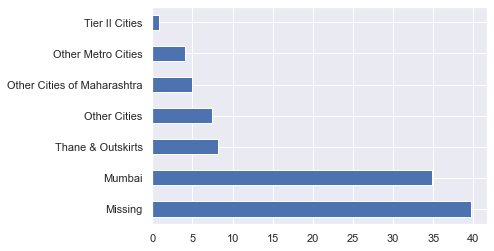

In [95]:
# City
(100*lead["City"].value_counts(normalize=True)).plot.barh()

<AxesSubplot:>

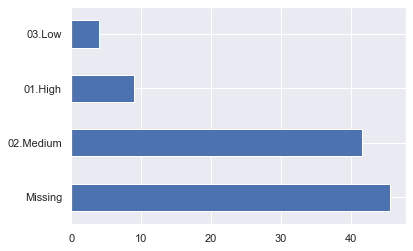

In [96]:
# Asymmetrique Activity Index
(100*lead["Asymmetrique Activity Index"].value_counts(normalize=True)).plot.barh()

<AxesSubplot:>

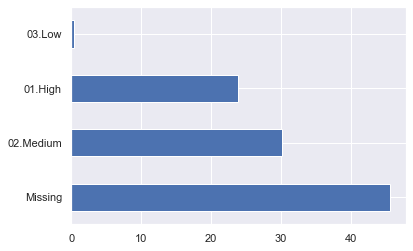

In [97]:
# Asymmetrique Profile Index
(100*lead["Asymmetrique Profile Index"].value_counts(normalize=True)).plot.barh()

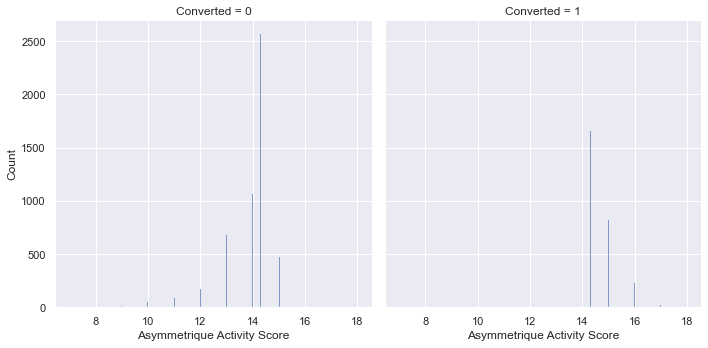

In [98]:
# Asymmetrique Activity Score
sns.displot(data=lead ,x=lead["Asymmetrique Activity Score"],col=lead["Converted"])
plt.show() 

<AxesSubplot:xlabel='Asymmetrique Activity Score'>

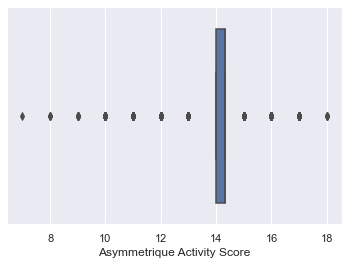

In [99]:
# Asymmetrique Activity Score
sns.boxplot(lead["Asymmetrique Activity Score"])

In [100]:
lead["Asymmetrique Activity Score"].describe()

count    9240.000000
mean       14.306252
std         1.022265
min         7.000000
25%        14.000000
50%        14.306252
75%        14.306252
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

In [101]:
Q1 = lead["Asymmetrique Activity Score"].quantile(0.25)
Q3 = lead["Asymmetrique Activity Score"].quantile(0.75)
print("Q1 : ",Q1,"\nQ3 : ",Q3)
IQR = Q3-Q1
print("IQR : ",IQR)
Min = Q1-1.5*IQR
Max = Q3+1.5*IQR

print("Min: ",Min)
print("Max: ",Max)
lead["Asymmetrique Activity Score"] = lead["Asymmetrique Activity Score"].apply(lambda x : Max if x>Max else x )
lead["Asymmetrique Activity Score"] = lead["Asymmetrique Activity Score"].apply(lambda x : Min if x<Min else x )

Q1 :  14.0 
Q3 :  14.306252489048187
IQR :  0.30625248904818747
Min:  13.540621266427719
Max:  14.765631222620469


<AxesSubplot:xlabel='Asymmetrique Activity Score'>

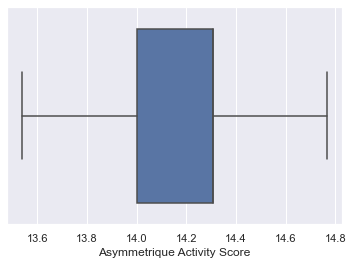

In [102]:
sns.boxplot(lead["Asymmetrique Activity Score"])

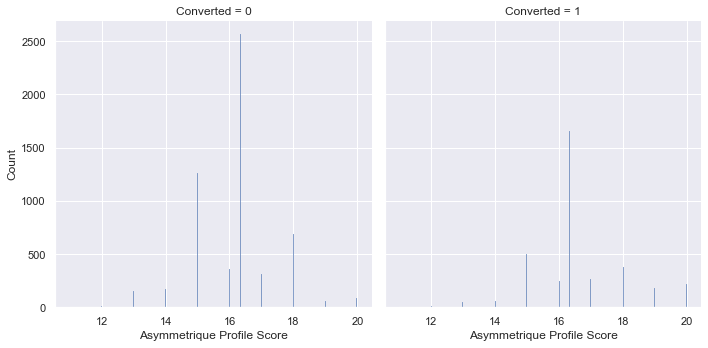

In [103]:
# Asymmetrique Profile Score
sns.displot(data=lead ,x=lead["Asymmetrique Profile Score"],col=lead["Converted"])
plt.show() 

<AxesSubplot:xlabel='Asymmetrique Profile Score'>

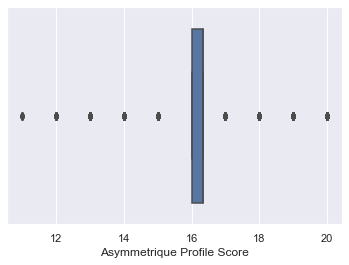

In [104]:
sns.boxplot(lead["Asymmetrique Profile Score"])

In [105]:
lead["Asymmetrique Profile Score"].describe()

count    9240.000000
mean       16.344883
std         1.335352
min        11.000000
25%        16.000000
50%        16.344883
75%        16.344883
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

In [106]:
Q1 = lead["Asymmetrique Profile Score"].quantile(0.25)
Q3 = lead["Asymmetrique Profile Score"].quantile(0.75)
print("Q1 : ",Q1,"\nQ3 : ",Q3)
IQR = Q3-Q1
print("IQR : ",IQR)
Min = Q1-1.5*IQR
Max = Q3+1.5*IQR

print("Min: ",Min)
print("Max: ",Max)
lead["Asymmetrique Profile Score"] = lead["Asymmetrique Profile Score"].apply(lambda x : Max if x>Max else x )
lead["Asymmetrique Profile Score"] = lead["Asymmetrique Profile Score"].apply(lambda x : Min if x<Min else x )

Q1 :  16.0 
Q3 :  16.344882516925527
IQR :  0.3448825169255265
Min:  15.48267622461171
Max:  16.862206292313815


<AxesSubplot:xlabel='Asymmetrique Profile Score'>

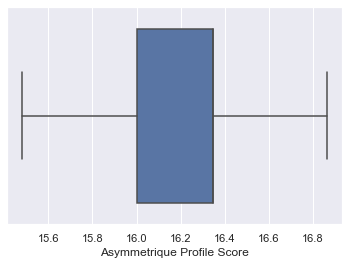

In [107]:
sns.boxplot(lead["Asymmetrique Profile Score"])

In [108]:
# I agree to pay the amount through cheque
lead["I agree to pay the amount through cheque"].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [109]:
# lead["I agree to pay the amount through cheque"] to drop,Almost 0 Variance
lead.drop("I agree to pay the amount through cheque",inplace = True, axis =1)

<AxesSubplot:>

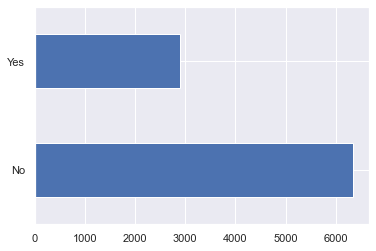

In [110]:
# a free copy of Mastering The Interview
lead["A free copy of Mastering The Interview"].value_counts().plot.barh()

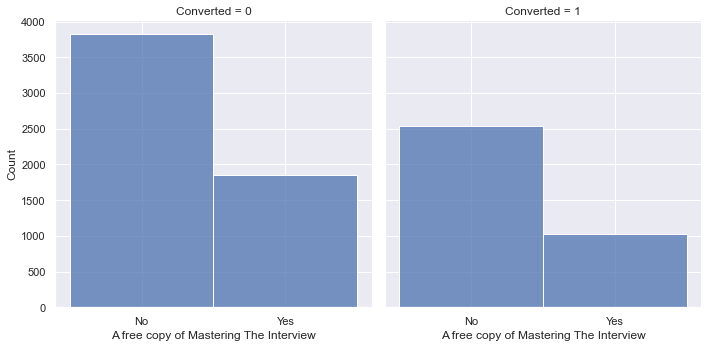

In [111]:
sns.displot(data=lead ,x=lead["A free copy of Mastering The Interview"],col=lead["Converted"])
plt.show() 

<AxesSubplot:>

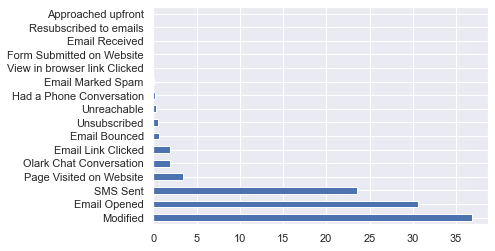

In [112]:
# Last Notable Activity
(100*lead["Last Notable Activity"].value_counts(normalize=True)).plot.barh()

In [113]:
#object 
list_ = lead.select_dtypes(include=['object'])
list_

,Lead Origin,Lead Source,Last Activity,Country,Specialization,What is your current occupation,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,India,Missing,Unemployed,Missing,02.Medium,02.Medium,No,Modified
1,API,Organic Search,Email Opened,India,Missing,Unemployed,Missing,02.Medium,02.Medium,No,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,India,Business Administration,Student,Mumbai,02.Medium,01.High,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,India,Media and Advertising,Unemployed,Mumbai,02.Medium,01.High,No,Modified
4,Landing Page Submission,Google,Converted to Lead,India,Missing,Unemployed,Mumbai,02.Medium,01.High,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Email Marked Spam,Non-India,IT Projects Management,Unemployed,Mumbai,02.Medium,01.High,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,SMS Sent,India,Media and Advertising,Unemployed,Mumbai,02.Medium,01.High,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,India,Business Administration,Unemployed,Mumbai,02.Medium,01.High,Yes,SMS Sent
9238,Landing Page Submission,Google,SMS Sent,India,Human Resource Management,Unemployed,Other Metro Cities,02.Medium,02.Medium,No,SMS Sent


### Creating Dummies

In [114]:
New = pd.get_dummies(list_,drop_first=True)
New

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Non-India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Missing,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Missing,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [116]:
#Conact the dummy variable
lead = pd.concat([lead, New], axis = 1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Non-India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Missing,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Missing,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Missing,Unemployed,Missing,02.Medium,02.Medium,14.765631,15.482676,No,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Missing,Unemployed,Missing,02.Medium,02.Medium,14.765631,15.482676,No,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Su

In [117]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 110 entries, Lead Number to Last Notable Activity_View in browser link Clicked
dtypes: float64(4), int64(3), object(11), uint8(92)
memory usage: 2.1+ MB


In [118]:
lead = lead.drop(list_.columns,axis =1)

In [119]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 99 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   int64  
 4   Page Views Per Visit                                  9240 non-null   float64
 5   Asymmetrique Activity Score                           9240 non-null   float64
 6   Asymmetrique Profile Score                            9240 non-null   float64
 7   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9240

In [120]:
lead.shape

(9240, 99)

In [121]:
lead.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Non-India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Missing,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Missing,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,14.765631,15.482676,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,14.765631,15.482676,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,14.000000,16.862206,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,13.540621,16.862206,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

# 3. Train-Test Split

In [122]:
#independent variables variable 
X =lead.drop(["Converted"],axis=1)

#Dependent variable
Y = lead["Converted"]



In [124]:
#splitting the dataset in train and test datasets using a split ratio of 70:30
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,train_size= 0.7,random_state=100)


# 4. Scaling numeric variables

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train.drop(columns = 'Lead Number'))
X_train_scale = pd.DataFrame(X_train_scale)
X_train_scale.columns = X_train.columns[1:]
X_train_scale.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Non-India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Missing,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Missing,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,-1.124680,-0.885371,-1.269958,1.376277,-1.562680,-1.057954,-0.293817,-0.071611,-0.012435,-0.610463,-0.071611,-0.686053,-0.017587,-0.012435,2.063622,-0.371121,-0.012435,-0.017587,-0.25331,-0.120121,-0.017587,-0.012435,-0.119457,-0.021542,-0.012435,-0.027814,0.0,-0.012435,-0.012435,-0.219769,-0.194171,-0.170637,-0.012435,1.273920,-0.017587,-0.113316,-0.058421,-0.337384,-0.278641,-0.012435,-0.655280,-0.094292,-0.077886,-0.027814,-0.012435,-0.180463,-0.213511,-0.075851,-0.114708,-0.343323,-0.125949,-0.116766,-0.317705,-0.196729,-0.138073,3.115864,-0.144895,-0.762254,-0.246324,-0.104599,-0.085555,-0.069397,-0.197576,-0.147651,-0.037328,-0.035191,-0.146554,0.337384,-0.290075,-0.727377,-0.287562,-0.228518,-0.206284,-0.293507,-0.08915,1.195722,-0.201347,-0.922878,1.531132,-0.057073,-0.922878,-0.673169,-0.078885,-0.136905,-0.012435,1.508289,-0.012435,-0.012435,-0.041274,-0.762761,-0.13749,-0.192882,-0.012435,-0

In [126]:
X_test_scale = scaler.transform(X_test.drop(columns = 'Lead Number'))
X_test_scale = pd.DataFrame(X_test_scale)
X_test_scale.columns = X_test.columns[1:]
X_test_scale.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Non-India,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Missing,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Missing,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Missing,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1.670345,0.964504,2.114966,0.125034,0.212107,-1.057954,-0.293817,-0.071611,-0.012435,1.638100,-0.071611,-0.686053,-0.017587,-0.012435,-0.484585,-0.371121,-0.012435,-0.017587,-0.253310,-0.120121,-0.017587,-0.012435,-0.119457,-0.021542,-0.012435,-0.027814,0.0,-0.012435,-0.012435,-0.219769,-0.194171,-0.170637,-0.012435,-0.784979,-0.017587,-0.113316,-0.058421,-0.337384,-0.278641,-0.012435,1.526065,-0.094292,-0.077886,-0.027814,-0.012435,-0.180463,-0.213511,-0.075851,-0.114708,-0.343323,-0.125949,-0.116766,-0.317705,-0.196729,-0.138073,-0.320938,-0.144895,1.311898,-0.246324,-0.104599,-0.085555,-0.069397,-0.197576,-0.147651,-0.037328,-0.035191,-0.146554,0.337384,-0.290075,-0.727377,-0.287562,-0.228518,-0.206284,-0.293507,-0.08915,-0.836315,-0.201347,1.083567,-0.653112,-0.057073,1.083567,-0.673169,-0.078885,-0.136905,-0.012435,-0.663003,-0.012435,-0.012435,-0.041274,-0.762761,-0.13749,-0.192882,-0.012435,1.79

# 5. Model Building

In [127]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train_scale,y_train)

LogisticRegression()

In [128]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_scale, y_train)

In [129]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [130]:
list(zip(X_train_scale.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 57),
 ('Lead Origin_Quick Add Form', False, 31),
 ('Lead Source_Direct Traffic', False, 74),
 ('Lead Source_Facebook', False, 56),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_NC_EDM', False, 29),
 ('Lead Source_Olark Chat', False, 4),
 ('Lead Source_Organic Search', False, 59),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 19),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 58),
 ('Lead Source_Social Media', False, 64),
 ('Lead Source_WeLearn', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 75),
 ('Lead Source_blog', Fa

In [131]:
# non-relevant cloumns
X_train_scale.columns[~rfe.support_]

Index(['Asymmetrique Profile Score', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreacha

In [132]:
col = X_train_scale.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Specialization_Missing',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [133]:
X_train_scale = X_train_scale[col]
X_test_scale = X_test_scale[col]

In [134]:
X_train_scale.shape

(6468, 15)

In [135]:
# Build a remove the varible manually now
import statsmodels.api as sm
X_train_scale_log = sm.add_constant(X_train_scale)
y_train=list(y_train)
logm = sm.GLM(y_train,X_train_scale_log, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2467.4
Date:                Fri, 06 May 2022   Deviance:                       4934.7
Time:                        20:00:57   Pearson chi2:                 6.58e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [136]:
# Checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_scale.columns
vif['VIF'] = [variance_inflation_factor(X_train_scale.values, i) for i in range(X_train_scale.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,3.28
11,Specialization_Missing,3.00
2,Page Views Per Visit,2.78
0,TotalVisits,2.49
5,Lead Origin_Lead Add Form,1.68
9,Last Activity_Olark Chat Conversation,1.32
6,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.22
13,What is your current occupation_Working Profes...,1.16
14,Last Notable Activity_SMS Sent,1.16


In [137]:
X_train_scale= X_train_scale.drop("What is your current occupation_Housewife",axis = 1)
X_test_scale = X_test_scale.drop("What is your current occupation_Housewife",axis = 1)

In [138]:
X_train_scale_log = sm.add_constant(X_train_scale)
y_train=list(y_train)
logm = sm.GLM(y_train,X_train_scale_log, family = sm.families.Binomial())
res = logm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2473.9
Date:                Fri, 06 May 2022   Deviance:                       4947.9
Time:                        20:00:58   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train_scale.columns
vif['VIF'] = [variance_inflation_factor(X_train_scale.values, i) for i in range(X_train_scale.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,3.28
11,Specialization_Missing,3.00
2,Page Views Per Visit,2.78
0,TotalVisits,2.49
5,Lead Origin_Lead Add Form,1.67
9,Last Activity_Olark Chat Conversation,1.32
6,Lead Source_Welingak Website,1.27
1,Total Time Spent on Website,1.22
13,Last Notable Activity_SMS Sent,1.16
12,What is your current occupation_Working Profes...,1.15


In [140]:
X_train_scale.shape

(6468, 14)

In [141]:
lr.fit(X_train_scale,y_train)

LogisticRegression()

#### Final Model "lr", Only one feautre "Lead Profile_Select" needs to be droped while budling the appropriate model

- FN: In actual the Lead was converted but model predicted not not Converted.
- In order to reduced FN, we should increase Sensitivity
- For that we need to find the optimal threshold value 

# Finding optimal threshold

In [142]:
y_train_pred = lr.predict_proba(X_train_scale)[:,1]
y_train_pred

array([0.60605644, 0.12459801, 0.16236847, ..., 0.32130216, 0.03946601,
       0.15249496])

Best Threshold=0.359496, G-Mean=0.825


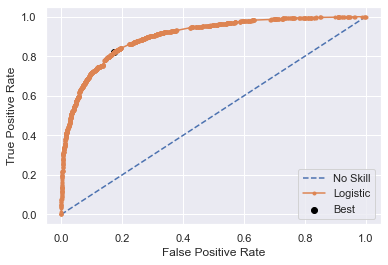

In [143]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()


# 5. Model Evaluation

# On train Data

In [144]:
y_train_new = list(map(lambda x: 1 if x>0.359496 else 0, y_train_pred))

In [145]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Accuracy: ", accuracy_score(y_train, y_train_new))
print("Recall/Sensitivity: ", recall_score(y_train, y_train_new))
print("Precision: ", precision_score(y_train, y_train_new))
print("F1 SCore: ", f1_score(y_train, y_train_new))
print("ROC AUC: ", roc_auc_score(y_train, y_train_new))

Accuracy:  0.825139146567718
Recall/Sensitivity:  0.8223844282238443
Precision:  0.7453142227122381
F1 SCore:  0.7819548872180451
ROC AUC:  0.8246105049664949


# Lead number conversion predictions

In [165]:
prediction = X_train[["Lead Number"]]
prediction['Actual'] = y_train
prediction['Score'] = y_train_pred*100
prediction['y_train_new']=y_train_new
prediction.head()

,Lead Number,Actual,Score,y_train_new
1871,641410,0,60.605644,1
6795,597687,0,12.459801,0
3516,626825,0,16.236847,0
8105,587928,0,66.227461,1
3934,622366,0,15.249496,0



# On test Data

In [149]:
y_test_pred = lr.predict_proba(X_test_scale)[:,1]
y_test_pred

array([0.7285825 , 0.95992286, 0.92038206, ..., 0.15249496, 0.43889118,
       0.90102588])

In [150]:
y_test_new = list(map(lambda x: 1 if x>0.359496 else 0, y_test_pred))

In [151]:
print("Accuracy: ", accuracy_score(y_test, y_test_new))
print("Recall/Sensitivity: ", recall_score(y_test, y_test_new))
print("Precision: ", precision_score(y_test, y_test_new))
print("F1 SCore: ", f1_score(y_test, y_test_new))
print("ROC AUC: ", roc_auc_score(y_test, y_test_new))

Accuracy:  0.8181818181818182
Recall/Sensitivity:  0.8100456621004566
Precision:  0.7497886728655959
F1 SCore:  0.7787532923617208
ROC AUC:  0.8167699986113494


# Test Prediction

In [164]:
prediction = X_test[["Lead Number"]]
prediction['Actual'] = y_test
prediction['Score'] = y_test_pred*100
prediction['y_test_new']=y_test_new
prediction.head()

,Lead Number,Actual,Score,y_test_new
4269,619003,1,72.858250,1
2376,636884,1,95.992286,1
7766,590281,1,92.038206,1
9199,579892,0,6.757301,0
4359,617929,1,88.014492,1
